# Bike Sharing Assignment

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
    
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

**Business Goal:**

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

**Data Preparation:**

- You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.

- You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it.


 **Model Building**

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. **The model should be built taking this 'cnt' as the target variable.**

 **Model Evaluation:**
    
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


1. where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.
2. Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.


## Reading and Understanding the Data

In [1]:
# Importing the numpy and pandas packages.
import numpy as np
import pandas as pd

#Importing matplotlib and seaborn libraries:
import matplotlib.pyplot as plt
import seaborn as sns

#Importing statsmodel libraries:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Importing sklearn libraries:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import calendar

from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data from csv file.
bikes = pd.read_csv('day.csv')

In [3]:
# Verifying the head of the dataset. Inspecting the various aspects of the bike dataframe.
bikes.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikes.shape

(730, 16)

In [6]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Visualising the Data

Numerical column in data :
- **instant**: record index
- **temp** : temperature in Celsius
- **atemp**: feeling temperature in Celsius
- **hum**: humidity
- **windspeed**: wind speed
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered

In [7]:
bikes[['temp', 'atemp', 'hum','windspeed','cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


 As temp and atemp are highly correlated, we can drop one of them

In [8]:
bikes = bikes.drop('atemp',axis=1)

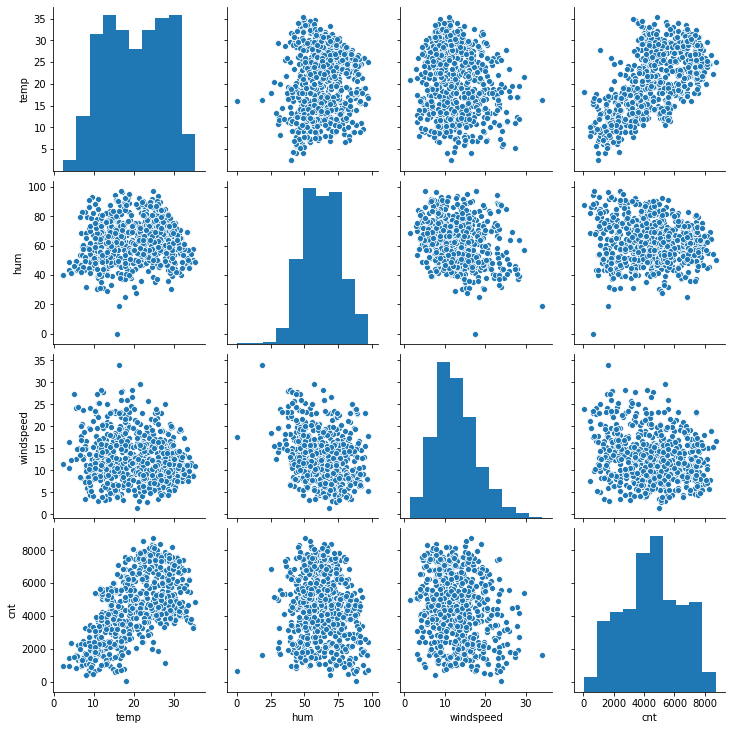

In [9]:
#pairplot of all numeric variable.
sns.pairplot(data=bikes,vars=['temp','hum','windspeed','cnt'])
plt.show()

Categorical columns from data:
- **season** : season (1:spring, 2:summer, 3:fall, 4:winter)
- **mnth** : month ( 1 to 12)
- **holiday** : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- **weathersit** : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **yr** : year (0: 2018, 1:2019)
- **weekday** : day of the week

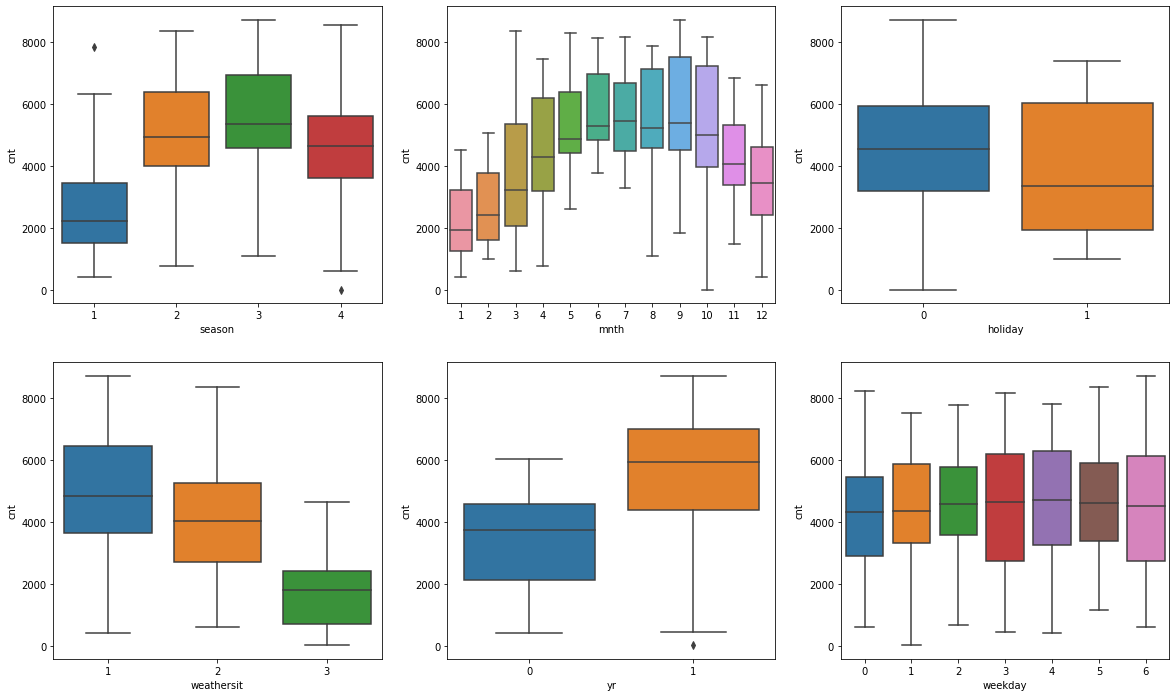

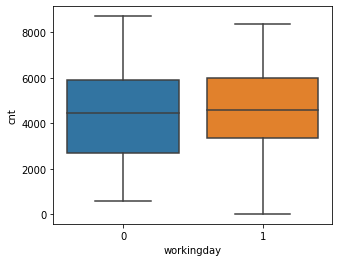

In [10]:
#Let's box distibution plot of all numeric variable.
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.figure(figsize=(5,4))
sns.boxplot(x='workingday',y='cnt',data=bikes)
plt.show()

From the plots we can infer following analysis:

- season : Number of bike sharing found to be less in spring.
- Highest demand for the bike rental seen in the month of September.
- Demand for the bike rental reduced during holidays.
- During Clear or little cloudy weather situations has noticed good demand for bike rental.  .
- Good demand for bike rental has been noticed during  Clear or little cloudy weather situation. However, durin Heavy Rain or Thunderstorm conditions zero demand for bike rental.  
- Its observed that Year-On-Year demand for bike rental has increased. 

## Data Preparation

In [11]:
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [12]:
bikes.shape

(730, 15)

In [13]:
# Dropping the columns which are not relevent for analysis and model selection
bikes.drop(['instant','dteday','casual','registered'],axis=1, inplace= True)

In [14]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [15]:
#converting numeric values to categorical data 
bikes['season'] = bikes.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [16]:
bikes['weekday'] = bikes.weekday.map({5:"Sunday",6:"Monday",0:"Tuesday",1:"Wednesday",2:"Thrusday",3:"Friday",4:"Saturday"})

In [17]:
bikes['weathersit'] = bikes.weathersit.map({1:'Clear',2:'Mist & Cloudy', 3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [18]:
bikes['mnth'] = bikes['mnth'].apply(lambda x: calendar.month_abbr[x])

In [19]:
# Confirming the data frame after droping unnecessaray columns and converting few columns.
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,0,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,0,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thrusday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [20]:
bikes.shape

(730, 11)

#### Dummy Variables

In [21]:
### creating dummy variables for season , mnth ,weathersit ,weekday
dummy = bikes[['season','mnth','weekday','weathersit']]
dummy = pd.get_dummies(dummy,drop_first=True)

# adding dummy variables to original dataset
bikes = pd.concat([dummy,bikes],axis = 1)

In [22]:
# We can confirm how our dataset looks now:
bikes.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Monday,0,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Tuesday,0,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Thrusday,1,Clear,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [23]:
bikes.shape

(730, 33)

In [24]:
# dropping the columns for which dummy variables have been created.
bikes.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [25]:
bikes.shape

(730, 29)

## Splitting the data into training and testing data sets

In [26]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
train,test = train_test_split(bikes,train_size = 0.7 , test_size = 0.3 , random_state = 100)

#### Rescaling the features.

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

We will be using MinMax scaling in this case study.

In [27]:
scaler = MinMaxScaler()

In [28]:
train.shape

(510, 29)

In [29]:
test.shape

(219, 29)

In [30]:
bikes.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [31]:
# Apply scaler() to all the columns except the 'dummy' variable
num_vars=['cnt','hum','windspeed','temp']

In [32]:
# Apply scaler() to rescale all the numerical columns (features) except the 'dummy' variables.
train[num_vars] = scaler.fit_transform(train[num_vars])

In [33]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.509887,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.504508,0.188475,0.482973


In [34]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.150980,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.358381,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
train.shape

(510, 29)

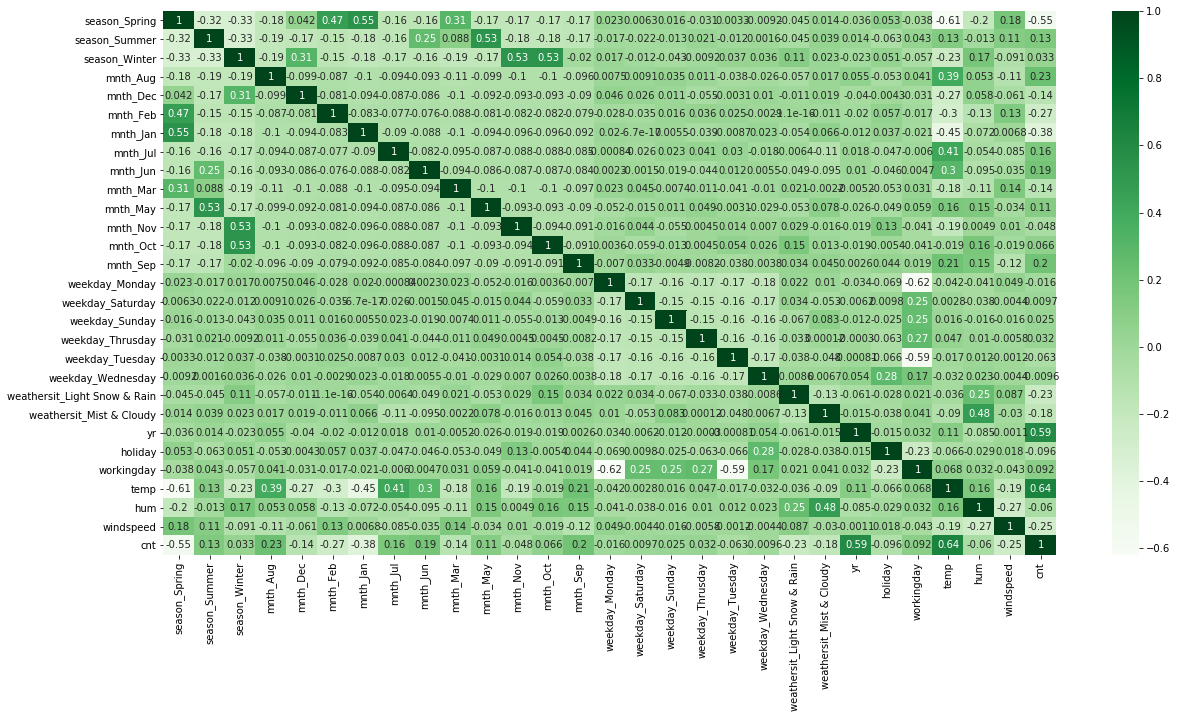

In [36]:
# Now we can check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 10))
matrix = np.triu(bikes.corr())
sns.heatmap(train.corr(), annot = True, cmap="Greens")
plt.show()

As we might have notice `temp`, `yr` seems to be highly correlated to `cnt` variable.

In [37]:
y_train = train.pop('cnt')
X_train = train

In [38]:
y_train.shape

(510,)

In [39]:
X_train.shape

(510, 28)

## Building a Linear Model

In [40]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 16)             
rfe = rfe.fit(X_train, y_train)

In [41]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 5),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 4),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 9),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', False, 11),
 ('weekday_Sunday', False, 10),
 ('weekday_Thrusday', False, 8),
 ('weekday_Tuesday', False, 6),
 ('weekday_Wednesday', False, 7),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

#### Lets start with the columns shortlisted by RFE.

In [42]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col  = X_train.columns[rfe.support_]
col.shape

(16,)

In [43]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Oct', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [44]:
X_train.columns[rfe.support_]

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weekday_Monday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [45]:
X_train.shape

(510, 28)

In [46]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [47]:
X_train_rfe.shape

(510, 16)

#### Model 1

Fit a regression line through the training data using `statsmodels`. In statsmodels, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [48]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [49]:
#Create first fitted model
lm_1 = sm.OLS(y_train,X_train_rfe).fit()

In [50]:
#Print summary of linear regression model obtained
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.6
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.10e-190
Time:                        21:09:12   Log-Likelihood:                 520.99
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     493   BIC:                            -936.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### Checking VIF for multicollinearity

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [51]:
#X_train_rfe = X_train_rfe.drop(['const'],axis =1 )

In [52]:
# Calculating the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,86.18
1,season_Spring,5.20
14,temp,3.97
3,season_Winter,3.77
2,season_Summer,2.67
15,hum,1.92
13,workingday,1.88
8,weekday_Monday,1.78
10,weathersit_Mist & Cloudy,1.57
4,mnth_Jan,1.57


As we observe from the summary the `mnth_Nov` has high p-value `0.143`, let's drop this column.

In [53]:
### dropping mnth_Nov from the model
X_train_rfe = X_train_rfe.drop(['mnth_Nov'], axis=1)

In [54]:
# Calculating the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.59
1,season_Spring,5.08
13,temp,3.89
3,season_Winter,3.60
2,season_Summer,2.64
14,hum,1.92
12,workingday,1.88
7,weekday_Monday,1.78
4,mnth_Jan,1.57
9,weathersit_Mist & Cloudy,1.57


#### Model 2


In [55]:
# Adding a constant variable 
import statsmodels.api as sm  
#X_train_rfe = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm_2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

# Lets print the linear regression model obtained.
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.31e-191
Time:                        21:09:13   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [56]:
#X_train_rfe = X_train_rfe.drop(['const'],axis =1 )

# Calculating the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.59
1,season_Spring,5.08
13,temp,3.89
3,season_Winter,3.60
2,season_Summer,2.64
14,hum,1.92
12,workingday,1.88
7,weekday_Monday,1.78
4,mnth_Jan,1.57
9,weathersit_Mist & Cloudy,1.57


As we observe from the summary the `mnth_Jan` has relatively high p-value `0.048` and low `coeff` that is `-0.0343`. Let's drop this column.

#### Model 3

In [57]:
X_train_rfe = X_train_rfe.drop(['mnth_Jan'],axis =1 )

# Adding a constant variable 
import statsmodels.api as sm  
#X_train_rfe = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm_3 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

# Check the summary
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.13e-191
Time:                        21:09:13   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [58]:
#X_train_rfe = X_train_rfe.drop(['const'],axis =1 )

# Calculating the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.34
1,season_Spring,5.02
12,temp,3.62
3,season_Winter,3.49
2,season_Summer,2.61
13,hum,1.91
11,workingday,1.88
6,weekday_Monday,1.78
8,weathersit_Mist & Cloudy,1.57
4,mnth_Jul,1.49


As we observe from the summary the `holiday` has relatively high p-value `0.028` and low `coeff` that is `-0.0594`. Let's drop this column.

In [59]:
X_train_rfe = X_train_rfe.drop(['holiday'],axis =1 )

#### Model 4

In [60]:
# Adding a constant variable 
import statsmodels.api as sm  
#X_train_rfe = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm_4 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

# Check the summary
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          8.51e-192
Time:                        21:09:13   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [61]:
#X_train_rfe = X_train_rfe.drop(['const'],axis =1 )

# Calculating the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,81.13
1,season_Spring,5.02
11,temp,3.62
3,season_Winter,3.49
2,season_Summer,2.61
12,hum,1.91
10,workingday,1.65
6,weekday_Monday,1.64
8,weathersit_Mist & Cloudy,1.57
4,mnth_Jul,1.49


Dropping `mnth_Jul` because this information might also be deduced from the `temp` features.

In [62]:
X_train_rfe = X_train_rfe.drop(['mnth_Jul'],axis =1 )

# Adding a constant variable 
import statsmodels.api as sm  
#X_train_rfe = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm_5 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

# Check the summary
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          4.23e-191
Time:                        21:09:13   Log-Likelihood:                 510.90
No. Observations:                 510   AIC:                            -995.8
Df Residuals:                     497   BIC:                            -940.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [63]:
#X_train_rfe = X_train_rfe.drop(['const'],axis =1 )

# Calculating the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,79.87
1,season_Spring,4.83
10,temp,3.53
3,season_Winter,3.28
2,season_Summer,2.28
11,hum,1.90
9,workingday,1.65
5,weekday_Monday,1.64
7,weathersit_Mist & Cloudy,1.57
6,weathersit_Light Snow & Rain,1.25


## Residual Analysis of the train data


Let's verify below assumtions:

- Error terms are normally distributed with mean zero.
- Error terms are independent of each other.
- Error terms have constant variance (homoscedasticity).

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.



In [64]:
y_train_pred = lm_5.predict(X_train_rfe)

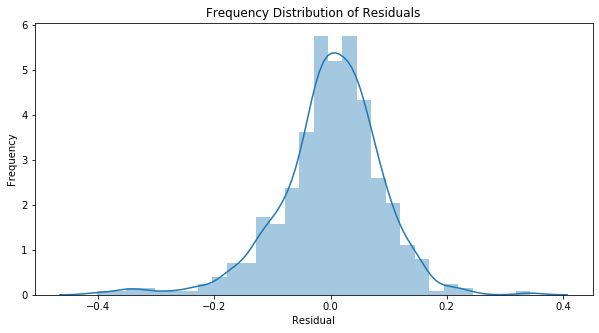

In [65]:
# Plot the histogram of the error terms
plt.figure(figsize=(10,5))
sns.distplot(y_train - y_train_pred, bins=30)
plt.title('Frequency Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

**The above graph explains Error terms are normally distributed with mean zero**

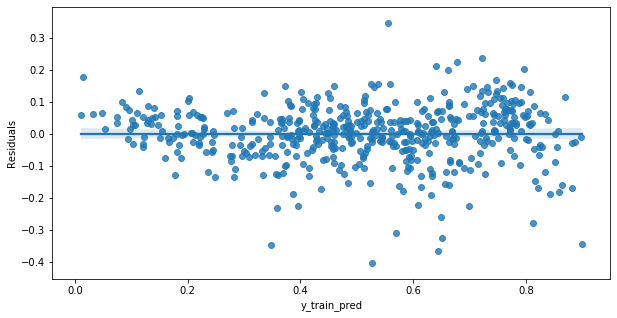

In [66]:
# Residual Analysis of Trained Data
plt.figure(figsize=(10,5))
sns.regplot(x= y_train_pred, y= y_train - y_train_pred)
plt.xlabel('y_train_pred')
plt.ylabel('Residuals')
plt.show()

**The above plot shows Error terms are independent of each other**

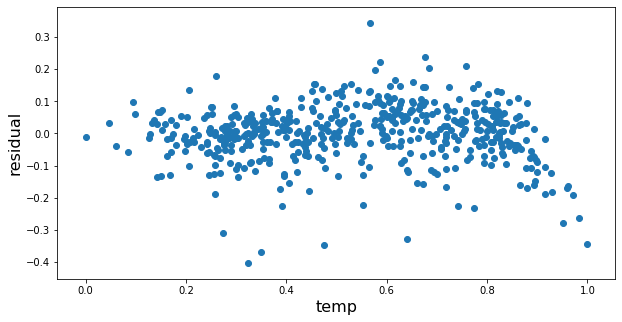

In [67]:
fig = plt.figure(figsize=(10,5))
plt.scatter(X_train_rfe.temp, y_train - y_train_pred)            
plt.xlabel('temp', fontsize = 16)                          
plt.ylabel('residual', fontsize = 16)
plt.show()

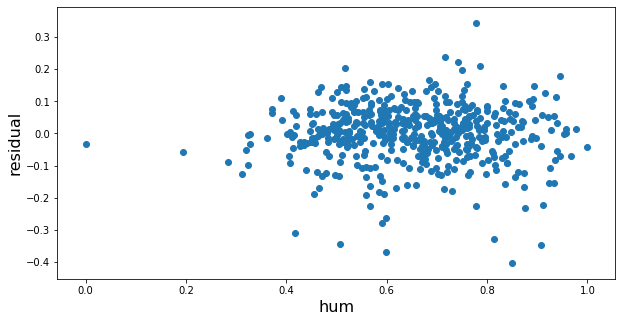

In [68]:
fig = plt.figure(figsize=(10,5))
plt.scatter(X_train_rfe.hum, y_train - y_train_pred)             
plt.xlabel('hum', fontsize = 16)                          
plt.ylabel('residual', fontsize = 16)
plt.show()

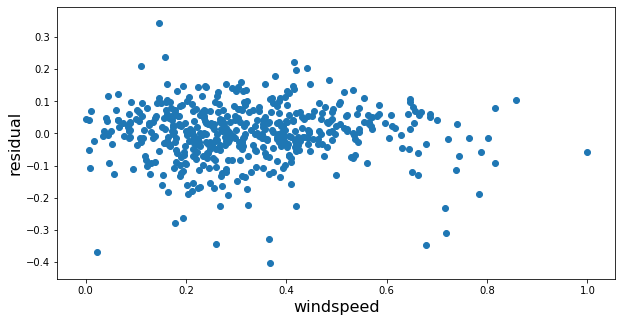

In [69]:
fig = plt.figure(figsize=(10,5))
plt.scatter(X_train_rfe.windspeed, y_train - y_train_pred)            
plt.xlabel('windspeed', fontsize = 16)                          
plt.ylabel('residual', fontsize = 16)
plt.show()

**The above plot shows Error terms have constant variance (homoscedasticity).**

## Making Predictions using the Final Model


In [70]:
#Applying the scaling on the test dataset
num_vars = ['cnt','hum','windspeed','temp']
test[num_vars] = scaler.transform(test[num_vars])

In [71]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.127854,0.027397,0.319635,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.334692,0.163612,0.467403,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


In [72]:
test.shape

(219, 29)

#### Dividing into X_test and y_test


In [73]:
y_test = test.pop('cnt')
X_test = test

In [74]:
X_test.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

In [75]:
X_test.shape

(219, 28)

In [76]:
# predicting using values used by the final model
test_col = X_train_rfe.columns
X_test=X_test[test_col[1:]]

In [77]:
X_test.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Sep',
       'weekday_Monday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [78]:
X_train_rfe.columns

Index(['const', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Sep',
       'weekday_Monday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [79]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [80]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    uint8  
 2   season_Summer                 219 non-null    uint8  
 3   season_Winter                 219 non-null    uint8  
 4   mnth_Sep                      219 non-null    uint8  
 5   weekday_Monday                219 non-null    uint8  
 6   weathersit_Light Snow & Rain  219 non-null    uint8  
 7   weathersit_Mist & Cloudy      219 non-null    uint8  
 8   yr                            219 non-null    int64  
 9   workingday                    219 non-null    int64  
 10  temp                          219 non-null    float64
 11  hum                           219 non-null    float64
 12  windspeed                     219 non-null    float64
dtypes: f

In [81]:
X_test.shape

(219, 13)

In [82]:
# Making predictions using the model
y_test_pred = lm_5.predict(X_test)

## Model Evaluation

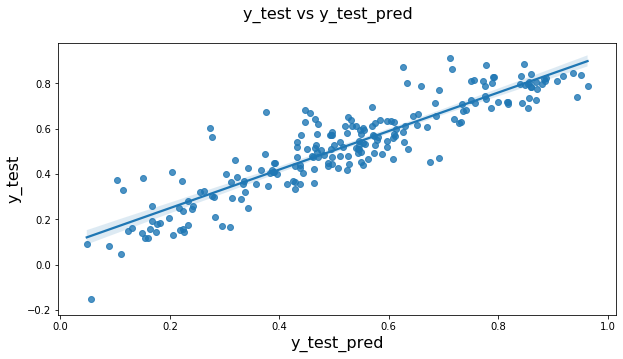

In [83]:
# # Plotting y_test and y_test_pred to understand the spread
fig = plt.figure(figsize=(10,5))
sns.regplot(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 16)
plt.xlabel('y_test_pred', fontsize = 16)                          
plt.ylabel('y_test', fontsize = 16)
plt.show()

<Figure size 720x720 with 0 Axes>

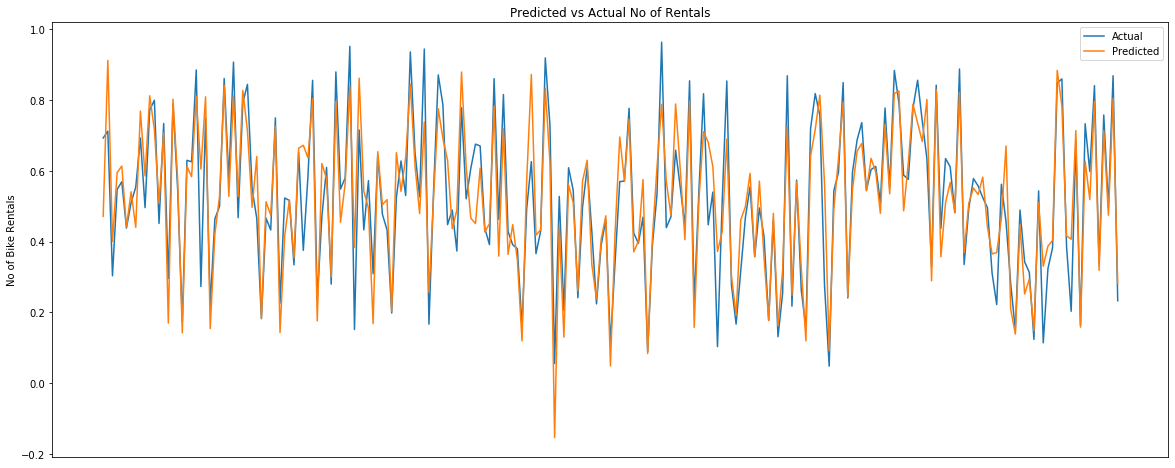

In [84]:
# Plotting Actual vs Predicted No of rentals 
plt.figure(figsize=[10,10])
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()


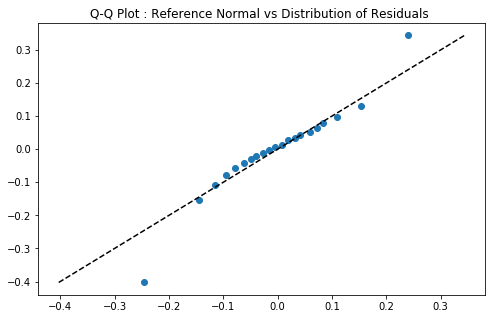

In [85]:
# Verifying the normality of distribution of residuals 
plt.figure(figsize=[8,5])
mean = (y_train-y_train_pred).mean()
std = (y_train-y_train_pred).std()
ref_normal = np.random.normal(mean,std,(y_train-y_train_pred).shape[0])
percs = np.linspace(0,100,21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(y_train - y_train_pred , percs)

plt.plot(qn_ref_normal,qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(),qn_residual.min())), np.max((qn_ref_normal.max(),qn_residual.max())))
m = plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot : Reference Normal vs Distribution of Residuals ')
plt.savefig('q-q-plot.png')
plt.show()

In [86]:
#Calculating R-squared for train data
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))

R-squared for train data: 0.84


In [87]:
#Calculating R-squared for test data
rsquared_test = r2_score(y_test, y_test_pred)
print('R-squared for test data:',round(rsquared_test,2))

R-squared for test data: 0.81


In [88]:
#Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error',round(mse,3))

Mean Squared Error 0.009


In [89]:
# Adjusted R^2 Value for test
# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-rsquared_test)*(n-1)/(n-p-1)
adjusted_r2

0.8024955015514579

**Train Dataset Analysis**
- R-squared for train data: 0.84
- The 84% (coefficient of determination) of variance in dependent variable cnt is predictable from the independent variables.

**Test Dataset Analysis**
- R-squared for test data: 0.81

**Mean Squared Error**: 0.009

**Adjusted r-square** : 0.80

In [90]:
param = pd.DataFrame(lm_5.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,13))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
10,temp,0.512675
8,yr,0.230700
0,const,0.216679
3,season_Winter,0.111924
4,mnth_Sep,0.094023
2,season_Summer,0.068717
5,weekday_Monday,0.062701
9,workingday,0.053223
1,season_Spring,-0.044772


### Case Study Conclusion

- The final relationship between demand and predictor is as follows:

    - *cnt = 0.216679 + 0.512675 X temp + 0.230700 X yr + 0.111924 X season_Winter + 0.094023 X mnth_Sep + 0.068717 X season_Summer + 0.062701 X weekday_Monday + 0.053223 X workingday - 0.044772 X season_Spring - 0.057310 X weathersit_Mist & Cloudy - 0.150823 X hum - 0.179875 X windspeed - 0.248516 X weathersit_Light Snow & Rain*


- Independent variables `temp`, `weathersit_Light Snow & Rain` and `yr` are top three factors significantly influencing the demand of rentals.

- **Positive Coefficients** :
    - temp, yr, season_Winter, mnth_Sep, season_Summer, weekday_Monday, workingday.
    - Increase in these coefficients will increase in cnt value. Means these variable are  posivively correlated to rental counts.

- **Negative Coefficients** :
    - season_Spring, weathersit_Mist & Cloudy, hum, windspeed, weathersit_Light Snow & Rain.
    - Increase in these coefficients will decrease in cnt value. Means these variables are  negatively correlated to rental counts.

- Highest demand for the bike rental observed in the month of `September`.

- Demand for the bike rental reduced during `holidays`.

- During `Clear or little cloudy` weather situations has noticed good demand for bike rental.  .
- Good demand for bike rental has been noticed during  `Clear or little cloudy` weather situation. However, during `Heavy Rain or Thunderstorm` conditions zero demand for bike rental.  
- Year-On-Year demand for bike rental has been increased. 